# Description

This work is based on the acquaintance with the convolutional neural network and its use for the recognition of handwritten numbers.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.datasets

import warnings
warnings.filterwarnings("ignore")

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# Tasks

Task 1. Use a convolutional neural network to recognize handwritten numbers (MNIST dataset).

__Data preparation__

In [ ]:
mnist_train = torchvision.datasets.MNIST('./', download=True, train=True)
mnist_test = torchvision.datasets.MNIST('./', download=True, train=False)
X_train = mnist_train.train_data
y_train = mnist_train.train_labels
X_test = mnist_test.test_data
y_test = mnist_test.test_labels

tensor(5)


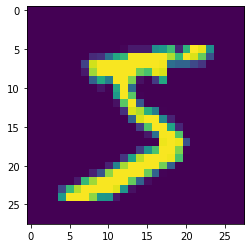

In [4]:
# display an example of the data
plt.imshow(X_train[0, :, :])
print(y_train[0])

In [5]:
# reshape the data
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([60000, 1, 28, 28]) torch.Size([10000, 1, 28, 28])
torch.Size([60000]) torch.Size([10000])


__Model__

In [7]:
class LeNet5(torch.nn.Module):
    
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.ac1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.ac2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.ac3 = torch.nn.Tanh()
        
        self.fc2 = torch.nn.Linear(120, 84)
        self.ac4 = torch.nn.Tanh()
        
        self.fc3 = torch.nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.ac1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.ac2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        
        x = self.fc1(x) 
        x = self.ac3(x)
        
        x = self.fc2(x) 
        x = self.ac4(x)
        
        x = self.fc3(x)
        
        return x

In [8]:
lenet5 = LeNet5()
lenet5

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (ac1): Tanh()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (ac2): Tanh()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (ac3): Tanh()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (ac4): Tanh()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

__Device__

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
lenet5 = lenet5.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

__Loss and optimizer__

In [11]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

__Model training__

In [12]:
batch_size = 100
test_accuracy_history = []
test_loss_history = []

for epoch in range(50):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

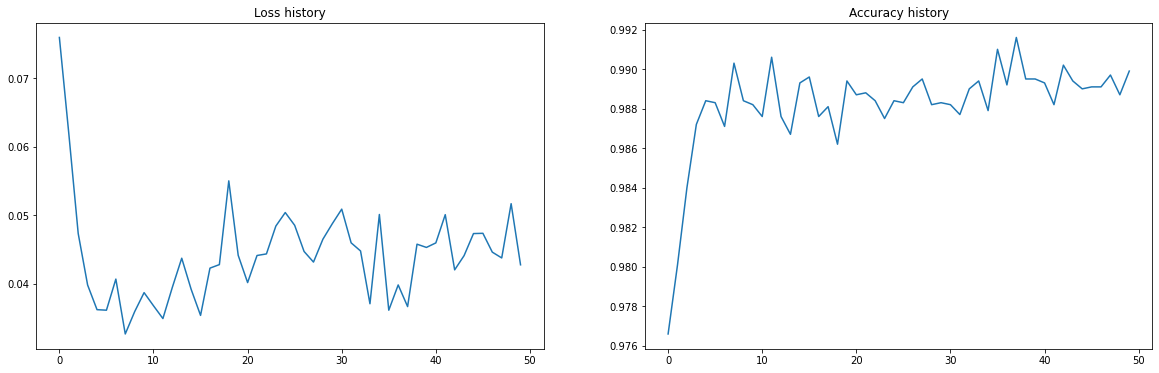

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(test_loss_history)
ax[0].title.set_text('Loss history')

ax[1].plot(test_accuracy_history)
ax[1].title.set_text('Accuracy history')

Task 2. Choose padding parameters.

In [14]:
N = 4
C, C_out = 3, 10
H, W = 8, 16
x = torch.ones((N, C, H, W))

In [15]:
# torch.Size([4, 10, 8, 16])
out = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=1)(x)
out.shape

torch.Size([4, 10, 8, 16])

In [16]:
# torch.Size([4, 10, 8, 16])
out = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=2)(x)
out.shape

torch.Size([4, 10, 8, 16])

In [17]:
# torch.Size([4, 10, 8, 16])
out = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=3)(x)
out.shape

torch.Size([4, 10, 8, 16])

In [18]:
# torch.Size([4, 10, 8, 16])
out = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=4)(x)
out.shape

torch.Size([4, 10, 8, 16])

In [19]:
# torch.Size([4, 10, 8, 16])
out = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1, 2))(x)
out.shape

torch.Size([4, 10, 8, 16])

In [20]:
# torch.Size([4, 10, 22, 30])
out = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=8)(x)
out.shape

torch.Size([4, 10, 22, 30])

In [21]:
# torch.Size([4, 10, 7, 15])
out = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=1)(x)
out.shape

torch.Size([4, 10, 7, 15])

In [22]:
# torch.Size([4, 10, 9, 17])
out = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=1)(x)
out.shape

torch.Size([4, 10, 9, 17])

Task 3. Use a convolutional neural network to classify images (CIFAR10 dataset).

__Data preparation__

In [ ]:
cifar_train = torchvision.datasets.CIFAR10('./', download=True, train=True);
cifar_test = torchvision.datasets.CIFAR10('./', download=True, train=False);
X_train = torch.Tensor(cifar_train.data)
y_train = torch.LongTensor(cifar_train.targets)
X_test = torch.Tensor(cifar_test.data)
y_test = torch.LongTensor(cifar_test.targets)

In [24]:
X_train /= 255
X_test /= 255

In [25]:
cifar_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(9)

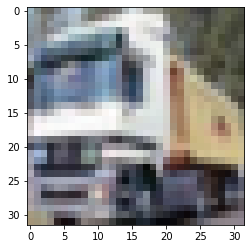

In [26]:
# display an example of the data
plt.imshow(X_train[1, :, :, :])
y_train[1]

In [27]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [28]:
# datasets shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([50000, 3, 32, 32]) torch.Size([10000, 3, 32, 32])
torch.Size([50000]) torch.Size([10000])


__Model__

In [29]:
class LeNet5_CIFAR10(torch.nn.Module):
    
    def __init__(self):
        super(LeNet5_CIFAR10, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=0)
        self.ac1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.ac2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.ac3 = torch.nn.Tanh()
        
        self.fc2 = torch.nn.Linear(120, 84)
        self.ac4 = torch.nn.Tanh()
        
        self.fc3 = torch.nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.ac1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.ac2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        
        x = self.fc1(x) 
        x = self.ac3(x)
        
        x = self.fc2(x) 
        x = self.ac4(x)
        
        x = self.fc3(x)
        
        return x

In [30]:
lenet5_cifar = LeNet5_CIFAR10()
lenet5_cifar

LeNet5_CIFAR10(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (ac1): Tanh()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (ac2): Tanh()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (ac3): Tanh()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (ac4): Tanh()
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

__Device__

In [31]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [32]:
X_test = X_test.to(device)
y_test = y_test.to(device)
lenet5_cifar = lenet5_cifar.to(device)

__Loss and optimizer__

In [33]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5_cifar.parameters(), lr=1.0e-3)

__Model training__

In [34]:
batch_size = 100
test_accuracy_history = []
test_loss_history = []

for epoch in range(20):
    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5_cifar.forward(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5_cifar.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

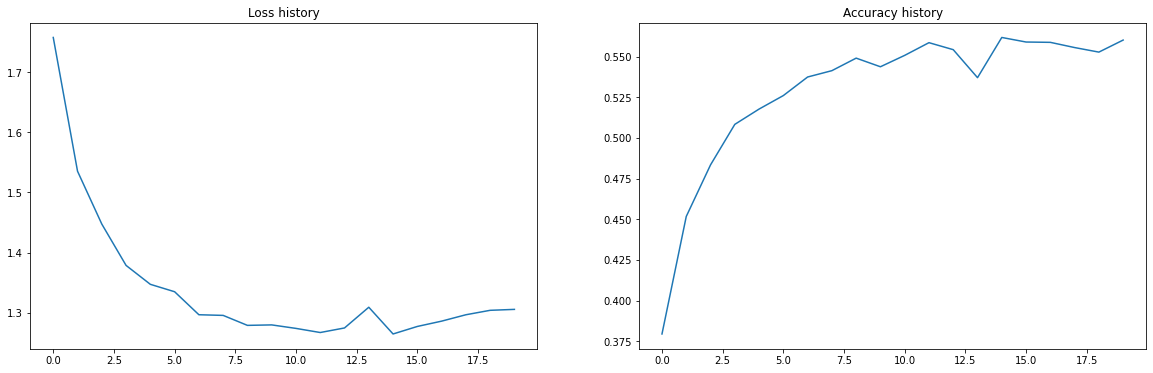

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(test_loss_history)
ax[0].title.set_text('Loss history')

ax[1].plot(test_accuracy_history)
ax[1].title.set_text('Accuracy history')